## Bering NCEP/NCAR Reanalysis 2mAir Temperature data for Bering Sea region

In [1]:
%matplotlib inline

In [2]:
#using xarray for data read
import xarray as xa
from netCDF4 import num2date
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Gather data from ESRL THREDDS server for Reanalysis II 2m air temperature data

NCEP/DOE 2 Reanalysis data provided by the NOAA/OAR/ESRL PSD, Boulder, Colorado, USA, from their Web site at http://www.esrl.noaa.gov/psd/ 

In [8]:
# 2m air temp
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.dailyavgs/gaussian_grid/'

tfile = 'air.2m.gauss.1979.nc'

The mask/scale function didn't work on readin of the esrl file... error is that \_Fillvalue and missing_value are different.  scale must be applied independantly or missing value should be properly set

In [9]:
### list of doy groupings for 8 day averages
doy_start = [335,343,351,359,2,10,18,26]
doy_end = [342,350,358,1,9,17,25,33]

In [44]:
with xa.open_dataset(threddspath+tfile, concat_characters=True, mask_and_scale=False, decode_times=True, decode_coords=True, drop_variables=None) as xdf:
    pd = xdf.isel(time=slice(-7,None),lat=[13,16],lon=[97,103])

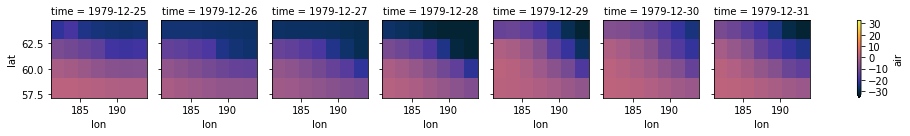

In [80]:
cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath+tfile, concat_characters=True, mask_and_scale=False, decode_times=True, decode_coords=True, drop_variables=None) as xdf:
    pd = xdf.isel(time=slice(-7,None),lat=slice(13,17),lon=slice(97,104))
    pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True)
    facet = (((pd['air']*pd.air.scale_factor)+pd.air.add_offset)-273.15).plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

In [114]:
xdf = xa.open_dataset(threddspath+tfile, concat_characters=True, mask_and_scale=False, decode_times=True, decode_coords=True, drop_variables=None)

pd = xdf.isel(time=slice(335,342+1),lat=[13,16],lon=[97,103])

In [115]:
#map to cf conventions
pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True)

In [116]:
pd['air'] = ((pd['air']*pd.air.scale_factor)+pd.air.add_offset)-273.15
eightday = pd.groupby(pd['time.dayofyear']).mean('time')
eightdayave = eightday.air.mean('dayofyear')

reshaping the gridded data (lat: 8, lon:11) -> lon1,lat1;lon1,lat2;lon1,lat3...

In [117]:
size = 1
for dim in np.shape(eightdayave): size *= dim

f_handle = file('tmp.txt', 'a')
np.savetxt(f_handle, eightdayave.data.reshape(1,size),fmt='%4.2f',delimiter=',')
f_handle.close()


In [118]:
print eightdayave.lon.data

[ 181.875  193.125]


In [119]:
print eightdayave.lat.data

[ 63.80789948  58.09389877]


In [120]:
np.shape(eightdayave)

(1, 2, 2)

In [121]:
(eightdayave)

<xarray.DataArray 'air' (level: 1, lat: 2, lon: 2)>
array([[[-16.183752, -11.049997],
        [ -0.416248,   1.565002]]], dtype=float32)
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 63.8079 58.0939
  * lon      (lon) float32 181.875 193.125

In [122]:
eightdayave.data.reshape(1,28)

ValueError: cannot reshape array of size 4 into shape (1,28)